In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sample-data/sample-data.csv
/kaggle/input/sample-data/recommender_system.py
/kaggle/input/sample-data/README.md
/kaggle/input/text-classification-data/training.csv
/kaggle/input/text-classification-data/test.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/text-classification-data/training.csv")
df_train.head()

,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT


In [3]:
category_codes = {
    'ARTS CULTURE ENTERTAINMENT': 1,
    'BIOGRAPHIES PERSONALITIES PEOPLE': 2,
    'DEFENCE': 3,
    'DOMESTIC MARKETS': 4,
    'FOREX MARKETS': 5,
    'HEALTH': 6,
    'MONEY MARKETS': 7,
    'SCIENCE AND TECHNOLOGY': 8,
    'SHARE LISTINGS': 9,
    'SPORTS': 10,
    'IRRELEVANT': 0
}
df_train['topic_code'] = df_train['topic']
df_train = df_train.replace({'topic_code':category_codes})
df_train.head()

,article_number,article_words,topic,topic_code
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS,5
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS,7
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS,10
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS,5
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT,0


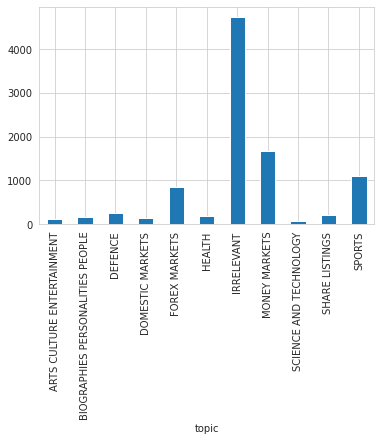

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

df_train.groupby('topic').article_words.count().plot.bar(ylim=0)
plt.show()

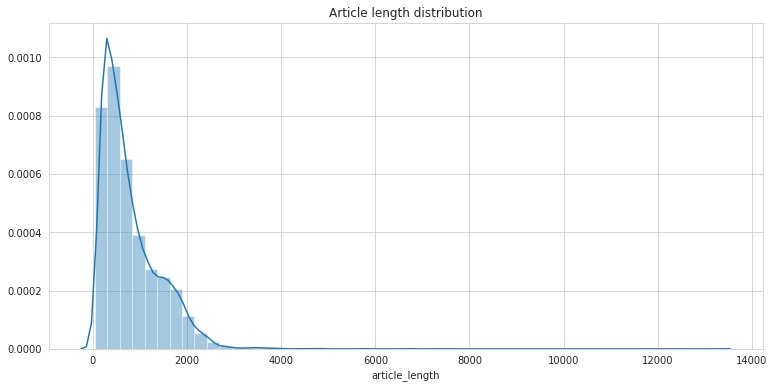

In [5]:
df_train['article_length'] = df_train['article_words'].str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(df_train['article_length']).set_title('Article length distribution');

In [7]:
quantile_95 = df_train['article_length'].quantile(0.95)
df_95 = df_train[df_train['article_length'] < quantile_95]

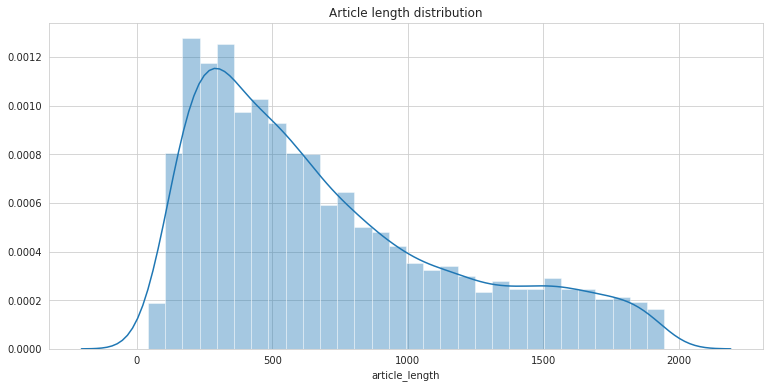

In [8]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['article_length']).set_title('Article length distribution');

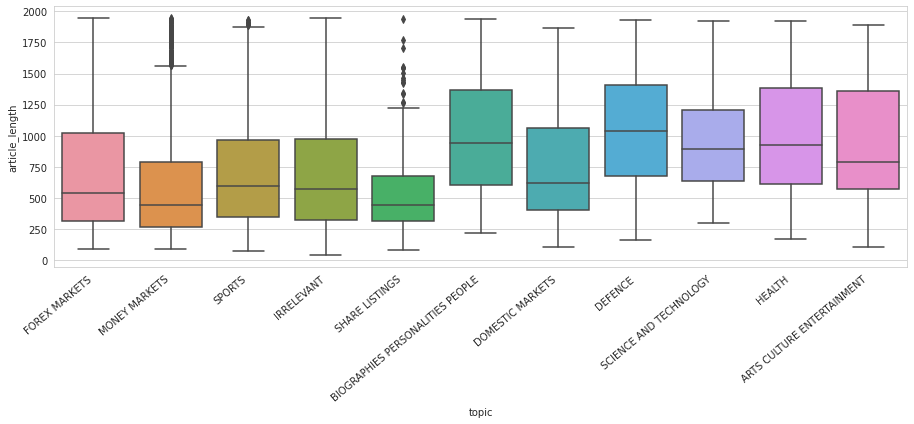

In [9]:
#plotting using box plot for data topics
plt.figure(figsize=(12.8,6))
ax = sns.boxplot(data=df_95, x='topic', y='article_length');

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
